### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) | Test Status |
|-                      |-                   |-                     |-                              |-            |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        | Waiting     |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        | Waiting     |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        | Waiting     |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [3]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [4]:
test_directory = Path("../test_data/coarse_tip_clearance/")
data_dict = {}

In [21]:
data_dict["test_5in_6blade_open_air_control"] = test_run(
    filename=Path("../test_data/open_air/test_5in_6blade.csv"), plan=plan
)
data_dict["test_5in_6blade_1500um"] = test_run(
    filename=test_directory / "test_5in_6blade_1500um.csv", plan=plan
)
data_dict["test_5in_6blade_1000um"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_2"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_2.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [22]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name                        time_ms                                      
test_5in_6blade_1500um           0.316             1414.0            1342.0   
                                 4.175                0.0               0.0   
                                 7.159                0.0               0.0   
                                 10.167               0.0               0.0   
                                 13.159               0.0               0.0   
...                                                   ...               ...   
test_5in_6blade_open_air_control 41969.158         1528.0            1471.0   
                                 41972.154         1528.0            1485.0   
                                 41975.158         1457.0            1400.0   
                                 41978.162         1457.0            1414.0   
                                 41982.150         1371.0            1328.0   

                                            batt_voltage_V  batt_current_A  \
test_name                        time_ms                                     
test_5in_6blade_1500um           0.316           16.905001           10.24   
                                 4.175           16.863001           10.24   
                                 7.159           16.884001           10.24   
                                 10.167          16.863001           10.24   
                                 13.159          16.863001           10.24   
...                                                    ...             ...   
test_5in_6blade_open_air_control 41969.158       15.834000           10.24   
                                 41972.154       15.834000           10.24   
                                 41975.158       15.813000           10.24   
                                 41978.162       15.813000           10.24   
                                 41982.150       15.813000           10.24   

                                            top_current_A  bottom_current_A  \
test_name                        time_ms                                      
test_5in_6blade_1500um           0.316            0.08724          -0.20865   
                                 4.175            0.14540          -0.19474   
                                 7.159            0.15994          -0.25038   
                                 10.167           0.24718          -0.34775   
                                 13.159           0.17448          -0.20865   
...                                                   ...               ...   
test_5in_6blade_open_air_control 41969.158        0.08724          -0.12519   
                                 41972.154       -0.00000          -0.29211   
                                 41975.158        0.05816          -0.11128   
                                 41978.162        0.04362          -0.23647   
                                 41982.150       -0.01454          -0.19474   

                                            thrust_N  torque_N  
test_name                        time_ms                        
test_5in_6blade_1500um           0.316      0.022243  0.000353  
                                 4.175      0.022243  0.000353  
                                 7.159      0.022243  0.000353  
                                 10.167     0.022243  0.000353  
                                 13.159     0.022243  0.000353  
...                                              ...       ...  
test_5in_6blade_open_air_control 41969.158  1.714019  0.007230  
                                 41972.154  1.714019  0.007230  
                                 41975.158  1.714019  0.007230  
                                 41978.162  1.714019  0.003469  
                                 41982.150  1.714019  0.003469  

[48408 rows x 8 columns]

In [23]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade_1000um"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.476,0.0,0.0,18.186001,10.24,0.14540,-0.20865,2.993658,0.000000
5.162,0.0,0.0,17.304001,10.24,0.18902,-0.29211,2.993658,-0.000003
9.165,0.0,0.0,17.073000,10.24,0.14540,-0.23647,2.993658,-0.000003
13.164,0.0,0.0,16.947001,10.24,0.10178,-0.20865,2.993658,0.000000
17.161,0.0,0.0,16.926001,10.24,0.15994,-0.20865,2.993658,0.000000
...,...,...,...,...,...,...,...,...
41965.157,2328.0,2285.0,16.023001,10.24,0.05816,-0.15301,4.471817,0.000000
41969.161,2214.0,2142.0,16.023001,10.24,0.04362,-0.54249,4.471817,-0.000003
41973.161,2100.0,2042.0,16.023001,10.24,-0.04362,-0.34775,4.471817,-0.000003


In [24]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [25]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                   mean         std   
test_name                        throttle                             
test_5in_6blade_1000um           5          1752.072000   12.075183   
                                 10         3138.288000   23.438655   
                                 15         4402.032000   41.059646   
                                 20         5696.148000   50.895101   
                                 25         6804.872000   48.733927   
...                                                 ...         ...   
test_5in_6blade_open_air_control 80        15732.929448  129.318466   
                                 85        16323.298462  123.228510   
                                 90        16843.773006  116.586148   
                                 95        17321.871560   90.127017   
                                 100       17748.249240   91.324094   

                                          bottom_motor_rpm              \
                                                      mean         std   
test_name                        throttle                                
test_5in_6blade_1000um           5             1758.536000   28.397224   
                                 10            3154.696000   34.902900   
                                 15            4465.256000   46.447778   
                                 20            5744.248000   33.928973   
                                 25            6960.544000   51.791132   
...                                                    ...         ...   
test_5in_6blade_open_air_control 80           15393.579755  118.560642   
                                 85           15901.427692  133.349438   
                                 90           16499.079755  100.295255   
                                 95           16894.345566   83.843521   
                                 100          17319.197568   84.036508   

                                          batt_voltage_V            \
                                                    mean       std   
test_name                        throttle                            
test_5in_6blade_1000um           5             16.866613  0.019083   
                                 10            16.846452  0.019091   
                                 15            16.823939  0.016413   
                                 20            16.788491  0.024246   
                                 25            16.724316  0.023424   
...                                                  ...       ...   
test_5in_6blade_open_air_control 80            14.928552  0.031636   
                                 85            14.711308  0.040021   
                                 90            14.439046  0.040044   
                                 95            14.217000  0.035962   
                                 100           13.960596  0.028557   

                                          batt_current_A            \
                                                    mean       std   
test_name                        throttle                            
test_5in_6blade_1000um           5             10.240000  0.000000   
                                 10            10.240000  0.000000   
                                 15            10.240000  0.000000   
                                 20            10.240000  0.000000   
                                 25            10.240000  0.000000   
...                                                  ...       ...   
test_5in_6blade_open_air_control 80            42.995092  1.730837   
                                 85            48.612677  1.671248   
                                 90            54.058650  1.681692   
                                 95            59.522691  1.416804   
                                 100           64.558784  1.194940   

                                          top_cu

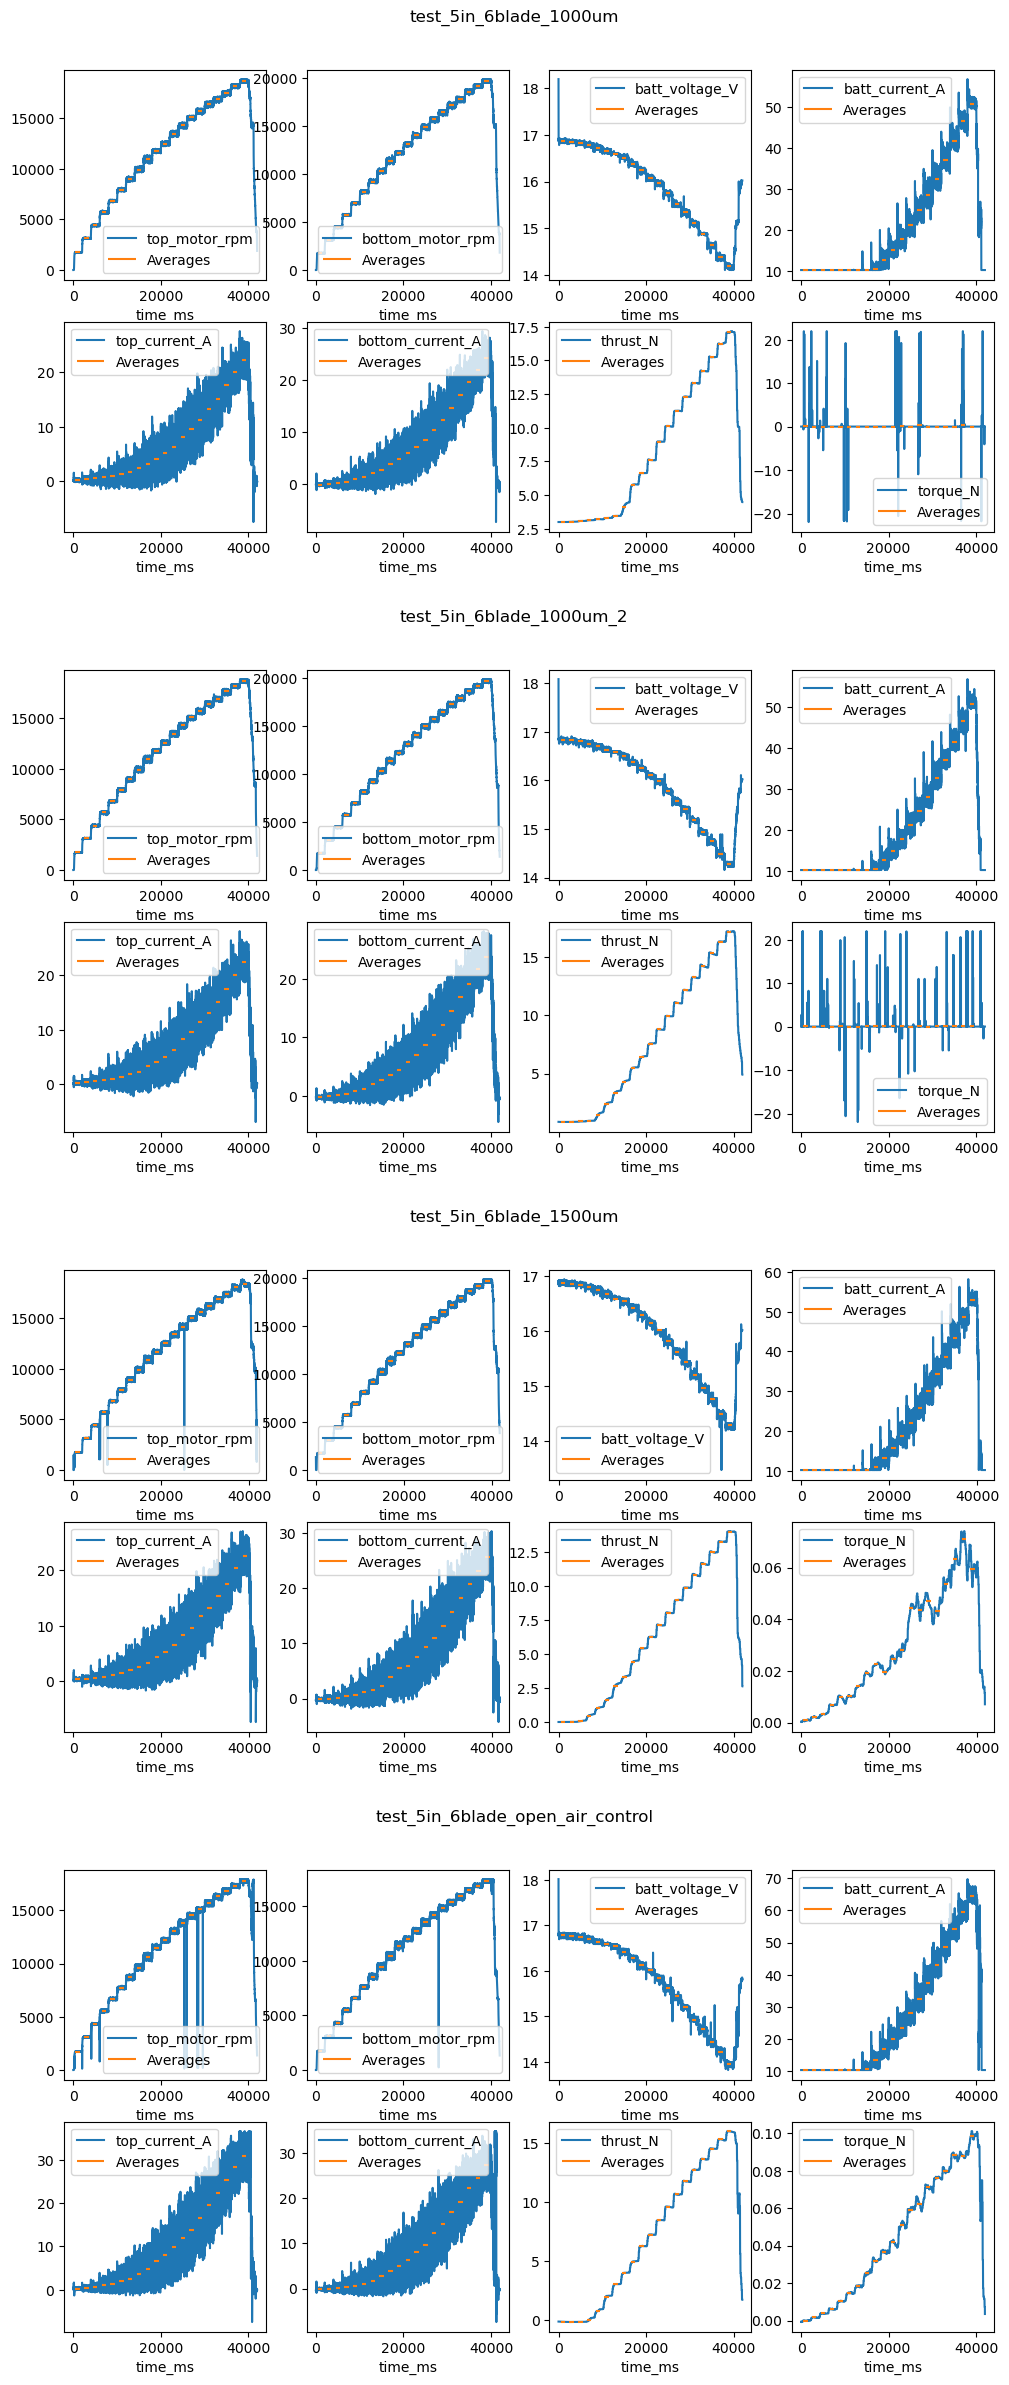

In [26]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [27]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = 5

hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

batt_power_rel_err

test_name                         throttle
test_5in_6blade_1000um            5           6.757255
                                  10          1.216252
                                  15          0.598382
                                  20          0.359772
                                  25          0.225680
                                                ...   
test_5in_6blade_open_air_control  80          0.033254
                                  85          0.031971
                                  90          0.030846
                                  95          0.030070
                                  100         0.029424
Name: mean, Length: 80, dtype: float64

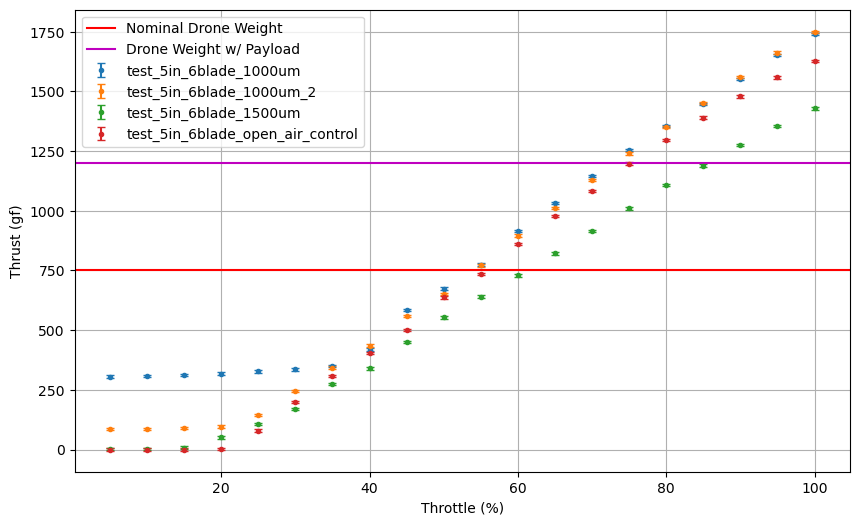

In [28]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [29]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

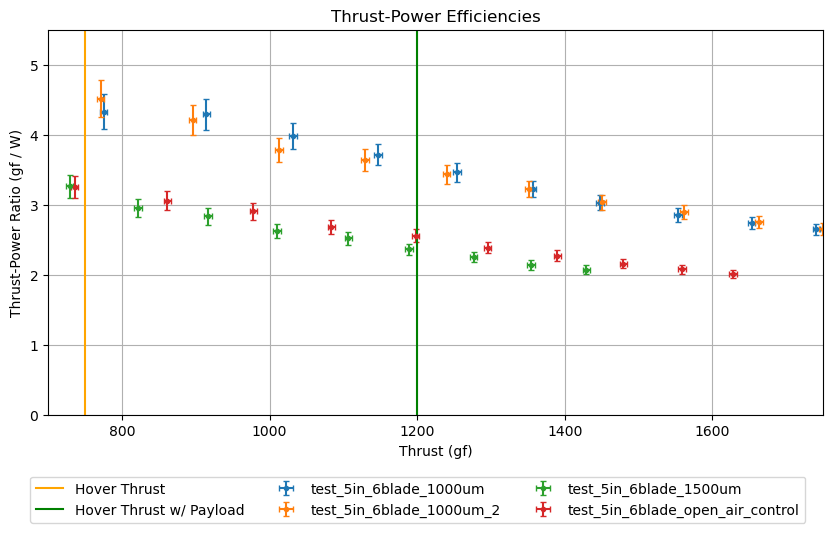

In [30]:
fig = plt.figure(figsize=(10, 5))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

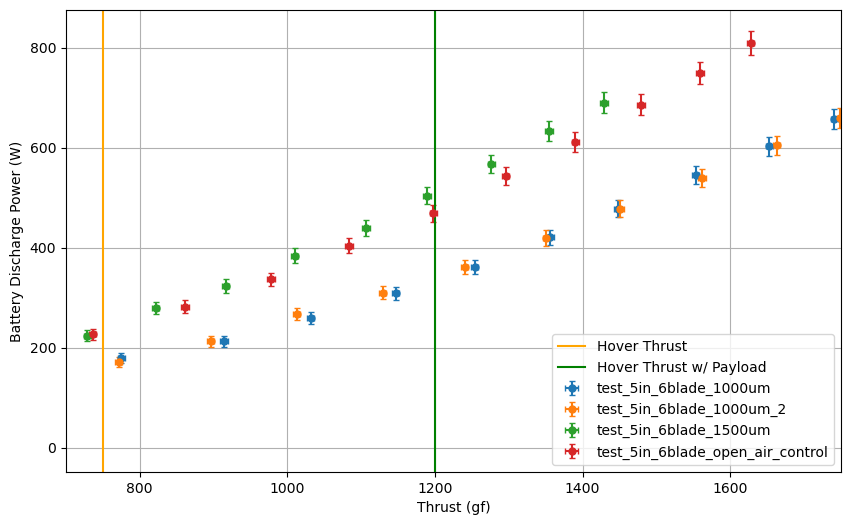

In [31]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1750)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [32]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name                        thrust_mean_g                               
test_5in_6blade_1000um           750.0          53.762078       169.829458   
                                 1200.0         72.483014       335.068228   
test_5in_6blade_1000um_2         750.0          54.113810       165.104814   
                                 1200.0         73.191222       342.817005   
test_5in_6blade_1500um           750.0          61.124838       235.883249   
                                 1200.0         85.627166       511.496011   
test_5in_6blade_open_air_control 750.0          55.555152       232.594791   
                                 1200.0         75.104333       470.201963   

                                                shunt_power_mean  \
test_name                        thrust_mean_g                     
test_5in_6blade_1000um           750.0                233.567394   
                                 1200.0               410.825844   
test_5in_6blade_1000um_2         750.0                232.815045   
                                 1200.0               413.625631   
test_5in_6blade_1500um           750.0                310.994437   
                                 1200.0               585.819271   
test_5in_6blade_open_air_control 750.0                324.368598   
                                 1200.0               571.213074   

                                                thrust_power_g_W  \
test_name                        thrust_mean_g                     
test_5in_6blade_1000um           750.0                  4.432758   
                                 1200.0                 3.591465   
test_5in_6blade_1000um_2         750.0                  4.548154   
                                 1200.0                 3.507636   
test_5in_6blade_1500um           750.0                  3.192340   
                                 1200.0                 2.347574   
test_5in_6blade_open_air_control 750.0                  3.229140   
                                 1200.0                 2.552638   

                                                shunt_thrust_power_g_W  \
test_name                        thrust_mean_g                           
test_5in_6blade_1000um           750.0                        3.214280   
                                 1200.0                       2.924285   
test_5in_6blade_1000um_2         750.0                        3.220539   
                                 1200.0                       2.902719   
test_5in_6blade_1500um           750.0                        2.414258   
                                 1200.0                       2.049164   
test_5in_6blade_open_air_control 750.0                        2.311931   
                                 1200.0                       2.101010   

                                                batt_power_err  thrust_g_err  \
test_name                        thrust_mean_g                                 
test_5in_6blade_1000um           750.0                9.917336           5.0   
                                 1200.0              13.464147           5.0   
test_5in_6blade_1000um_2         750.0                9.813448           5.0   
                                 1200.0              13.653882           5.0   
test_5in_6blade_1500um           750.0               11.382335           5.0   
                                 1200.0              17.335674           5.0   
test_5in_6blade_open_air_control 750.0               11.316175           5.0   
                                 1200.0              16.478683           5.0   

                                                thrust_power_err  
test_name                        thrust_mean_g                    
test_5in_6blade_1000um           750.0                  0.262878  
                                 1200.0                 0.145700  
test_5in_6blade_1000um_2         750.0                  0.273423  
                             

In [33]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                         thrust_mean_g
test_5in_6blade_1000um            750.0           0 days 00:08:53.335034214
                                  1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_2          750.0           0 days 00:09:08.596966399
                                  1200.0          0 days 00:04:24.210930914
test_5in_6blade_1500um            750.0           0 days 00:06:23.986570536
                                  1200.0          0 days 00:02:57.080559768
test_5in_6blade_open_air_control  750.0           0 days 00:06:29.415427056
                                  1200.0          0 days 00:03:12.632117835
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

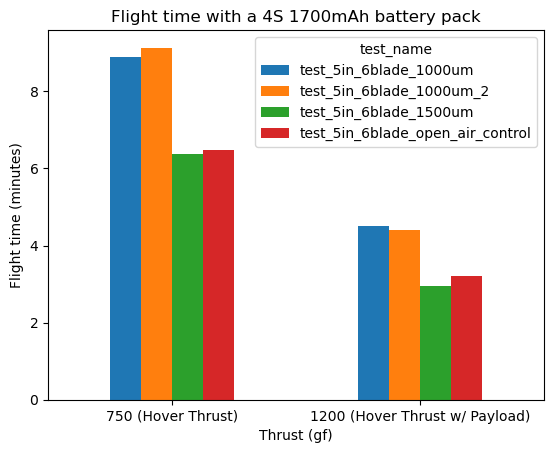

In [34]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)